In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("news_articles.csv")

In [8]:
df.sample(5)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
1886,No Author,2016-10-26T19:45:00.000+03:00,poll finds americans support for police highes...,i dont think any different than i did before h...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,trump mocks bidens dare take behind gym,uptodate going government learn information tv...,1.0
519,No Author,2016-10-27T21:11:33.687+03:00,donald trump claims the election will be rigge...,email \n\nformer president bill clinton can be...,english,awdnews.com,http://awdnews.com/images/1477585908donald-tru...,conspiracy,Fake,donald trump claims election rigged critics ca...,email former president bill clinton heard tell...,1.0
596,No Author,2016-10-28T18:15:56.606+03:00,life move over soulcycle this spin studio moti...,email \nits time to get excited because marvel...,english,clickhole.com,http://images.onionstatic.com/clickhole/3431/2...,satire,Fake,life move soulcycle spin studio motivates stud...,email time get excited marvel comics announced...,1.0
723,Louis Proyect,2016-10-28T10:59:50.249+03:00,the outsiderinsider isaac babels big mistake,go to article \nthis weeks wikileaks dump prov...,english,counterpunch.org,http://i1.wp.com/www.counterpunch.org/wp-conte...,bs,Fake,outsiderinsider isaac babels big mistake,go article weeks wikileaks dump provided sordi...,1.0
1957,Birdie Houck,2016-10-26T22:46:37.740+03:00,no title,anatomy lesson published mins ago \neditors n...,english,westernjournalism.com,http://static.westernjournalism.com/wp-content...,bias,Real,title,actor jim caviezel portraying jesus passion ch...,1.0


C:\Users\lithi\AppData\Local\Temp\ipykernel_7052\1824907060.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='Set2')


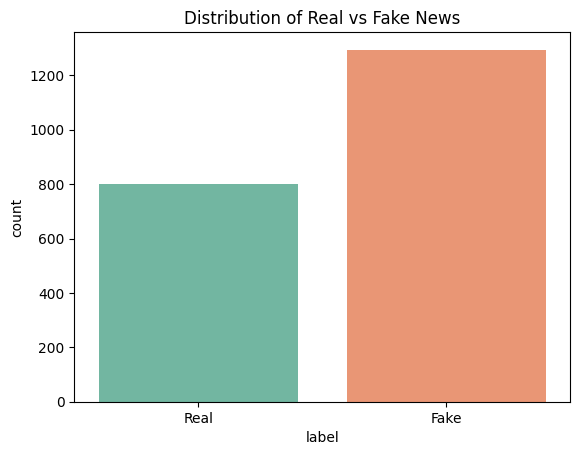

In [4]:
sns.countplot(x='label', data=df, palette='Set2')
plt.title('Distribution of Real vs Fake News')
plt.show()


C:\Users\lithi\AppData\Local\Temp\ipykernel_7052\2243163908.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set3')


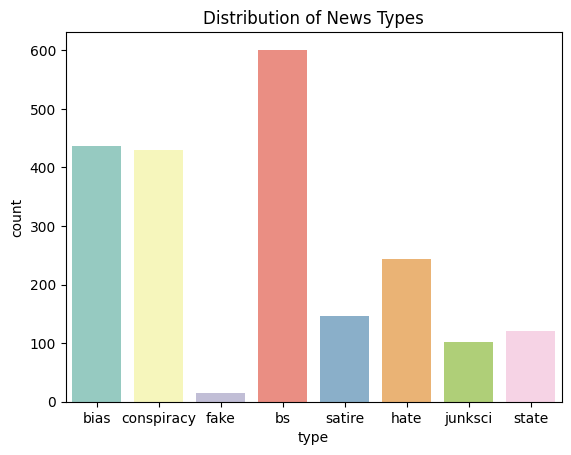

In [9]:
sns.countplot(x='type', data=df, palette='Set3')
plt.title('Distribution of News Types')
plt.show()

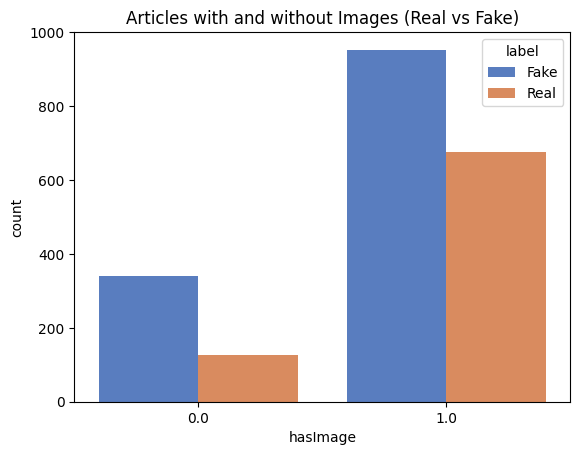

In [12]:
sns.countplot(x='hasImage', hue='label', data=df, palette='muted')
plt.title('Articles with and without Images (Real vs Fake)')
plt.show()

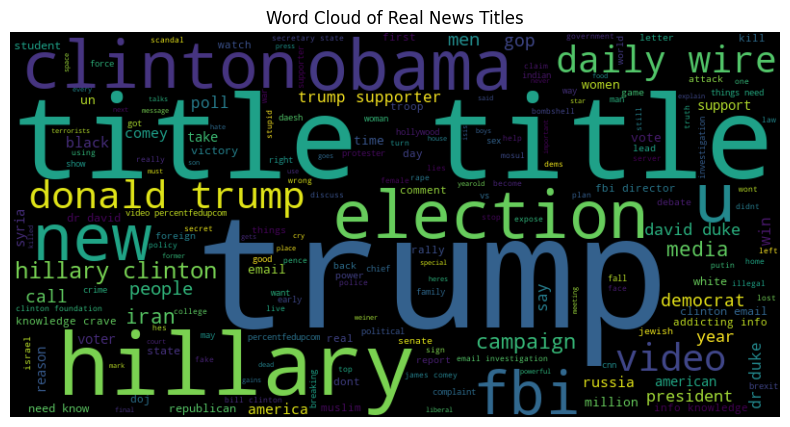

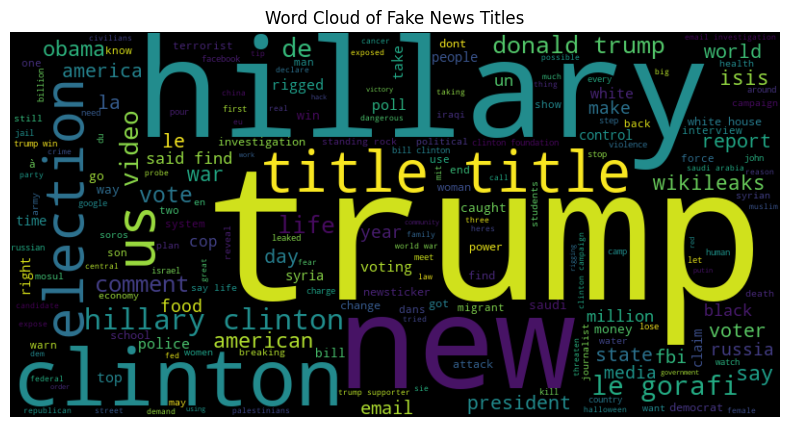

In [14]:
# Replace any NaNs in 'title_without_stopwords' with empty strings
df['title_without_stopwords'] = df['title_without_stopwords'].fillna('')

# Join the words in real and fake titles into one string each
real_titles = ' '.join(df[df['label'] == 'Real']['title_without_stopwords'])
fake_titles = ' '.join(df[df['label'] == 'Fake']['title_without_stopwords'])

# Generate word clouds
wordcloud_real = WordCloud(width=800, height=400).generate(real_titles)
wordcloud_fake = WordCloud(width=800, height=400).generate(fake_titles)

# Display word cloud for real news titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud of Real News Titles')
plt.axis('off')
plt.show()

# Display word cloud for fake news titles
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud of Fake News Titles')
plt.axis('off')
plt.show()


C:\Users\lithi\AppData\Local\Temp\ipykernel_7052\3980223413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sites.values, y=top_sites.index, palette='viridis')


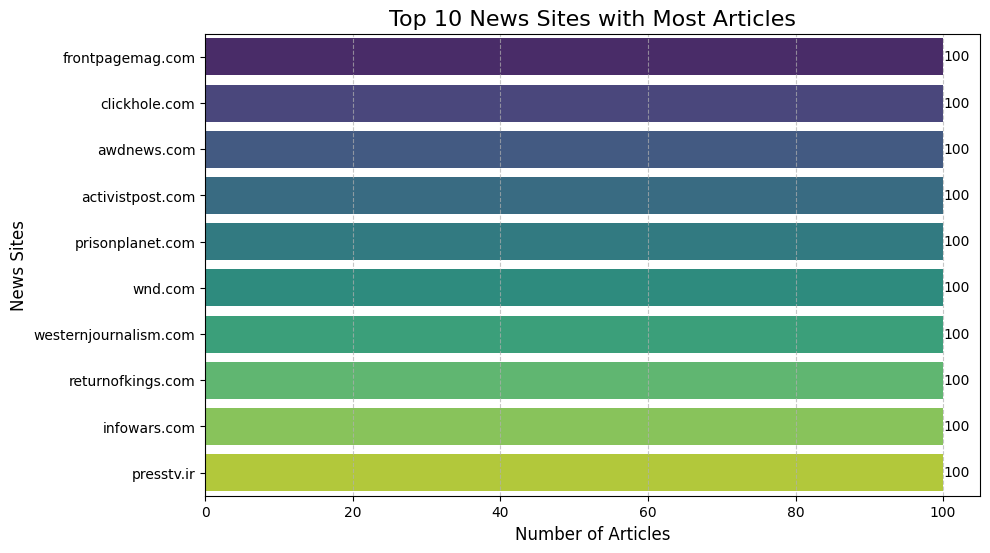

In [15]:
# Get the top 10 news sites
top_sites = df['site_url'].value_counts().nlargest(10)

# Create a horizontal bar plot with annotations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sites.values, y=top_sites.index, palette='viridis')
plt.title('Top 10 News Sites with Most Articles', fontsize=16)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('News Sites', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adding annotations
for index, value in enumerate(top_sites.values):
    plt.text(value, index, str(value), va='center')

plt.show()

C:\Users\lithi\AppData\Local\Temp\ipykernel_7052\1671827985.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  article_counts = df.set_index('published').groupby('type').resample('M').size().unstack()


published   2016-10-31 00:00:00+00:00  2016-11-30 00:00:00+00:00
type                                                            
bias                              292                        144
bs                                283                        317
conspiracy                        333                         97
fake                                4                         11
hate                               83                        160
junksci                            75                         27
satire                             18                        128
state                             101                         20


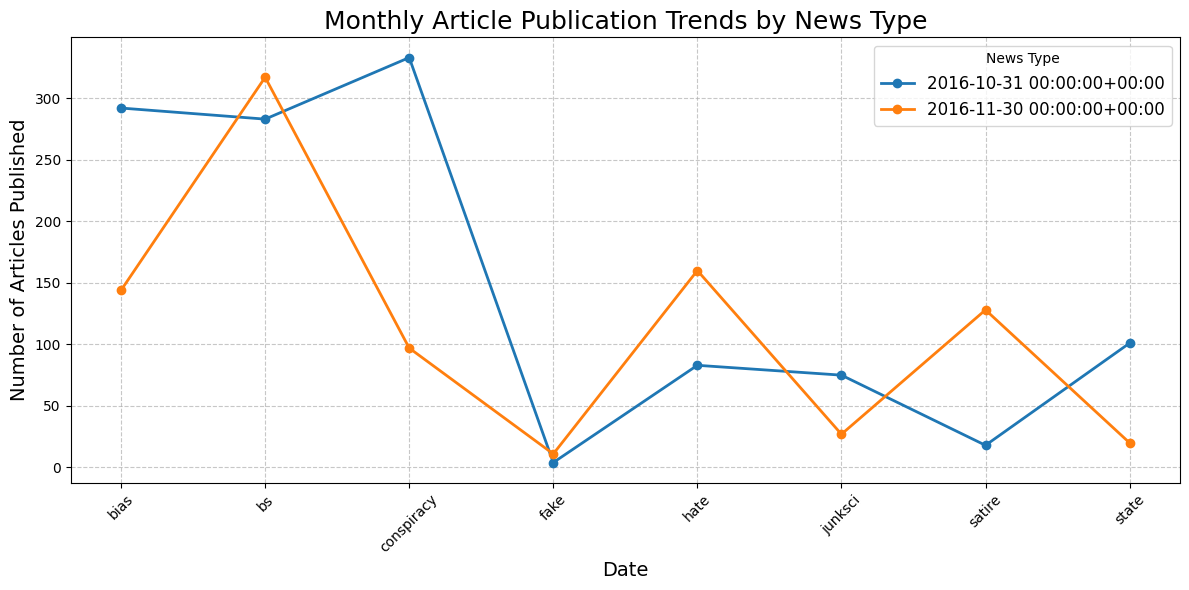

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'published' is in UTC format and drop NaT values
df['published'] = pd.to_datetime(df['published'], errors='coerce', utc=True)
df = df.dropna(subset=['published'])

# Group by 'type' and resample for monthly counts
article_counts = df.set_index('published').groupby('type').resample('M').size().unstack()

# Print article_counts to check its content
print(article_counts)

# Check if there's data for plotting
if article_counts.isnull().all().all():
    print("No data available for plotting.")
else:
    plt.figure(figsize=(12, 6))
    for news_type in article_counts.columns:
        if news_type in article_counts:
            plt.plot(article_counts.index, article_counts[news_type], marker='o', linestyle='-', linewidth=2, label=news_type)

    plt.title('Monthly Article Publication Trends by News Type', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Articles Published', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(title='News Type', fontsize=12)
    plt.tight_layout()
    plt.show()